<a href="https://colab.research.google.com/github/sukhyun1017/pytorch-study/blob/main/pytorch_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install torchvision

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [3]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [5]:
# MNIST dataset
#torchvision.datasets.dsets.MNIST를 통해서 dataset 불러오기
mnist_train = dsets.MNIST(root='MNIST_data/', #다운받을 경로
                          train=True,         #훈련or 테스트
                          transform=transforms.ToTensor(), #텐서로 변환
                          download=True) #경로에 없으면 다운

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [6]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=64,
                         shuffle=True,
                         drop_last=True) # 마지막 배치를 버릴지 말지 

In [8]:
model = nn.Linear(784,10,bias=True).to(device) # to함수는 어디서 계산할지

In [9]:
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [14]:
training_epochs=20
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 64이므로 아래의 연산에서 X는 (64, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        H = model(X)
        cost = criterion(H, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.258445621
Epoch: 0002 cost = 0.257650793
Epoch: 0003 cost = 0.257021040
Epoch: 0004 cost = 0.256102890
Epoch: 0005 cost = 0.255872399
Epoch: 0006 cost = 0.255310386
Epoch: 0007 cost = 0.254740387
Epoch: 0008 cost = 0.254202694
Epoch: 0009 cost = 0.253795356
Epoch: 0010 cost = 0.253502756
Epoch: 0011 cost = 0.252930045
Epoch: 0012 cost = 0.252382070
Epoch: 0013 cost = 0.252005875
Epoch: 0014 cost = 0.251619071
Epoch: 0015 cost = 0.251308680
Epoch: 0016 cost = 0.250411838
Epoch: 0017 cost = 0.250421613
Epoch: 0018 cost = 0.250250429
Epoch: 0019 cost = 0.249639824
Epoch: 0020 cost = 0.249529079
Learning finished


Accuracy: 0.8705999851226807
random r: 3265
Label:  0
Prediction:  0


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


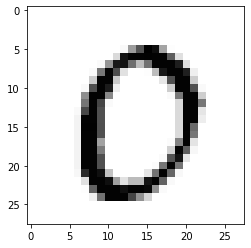

In [45]:
with torch.no_grad(): #gradient 계산 x

  X_test = mnist_test.test_data.view(-1,28*28).float().to(device)
  Y_test = mnist_test.test_labels.to(device)

  prediction = model(X_test)
  correct_prediction = torch.argmax(prediction, 1) == Y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

  r = random.randint(0, len(mnist_test) - 1)
  print('random r:',r)
  X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
  Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

  print('Label: ', Y_single_data.item())
  single_prediction = model(X_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
  plt.show()